# Final Project (Capstone Project)

## The Financial Analyst Challenge: Analyze and advice on a Client´s portfolio

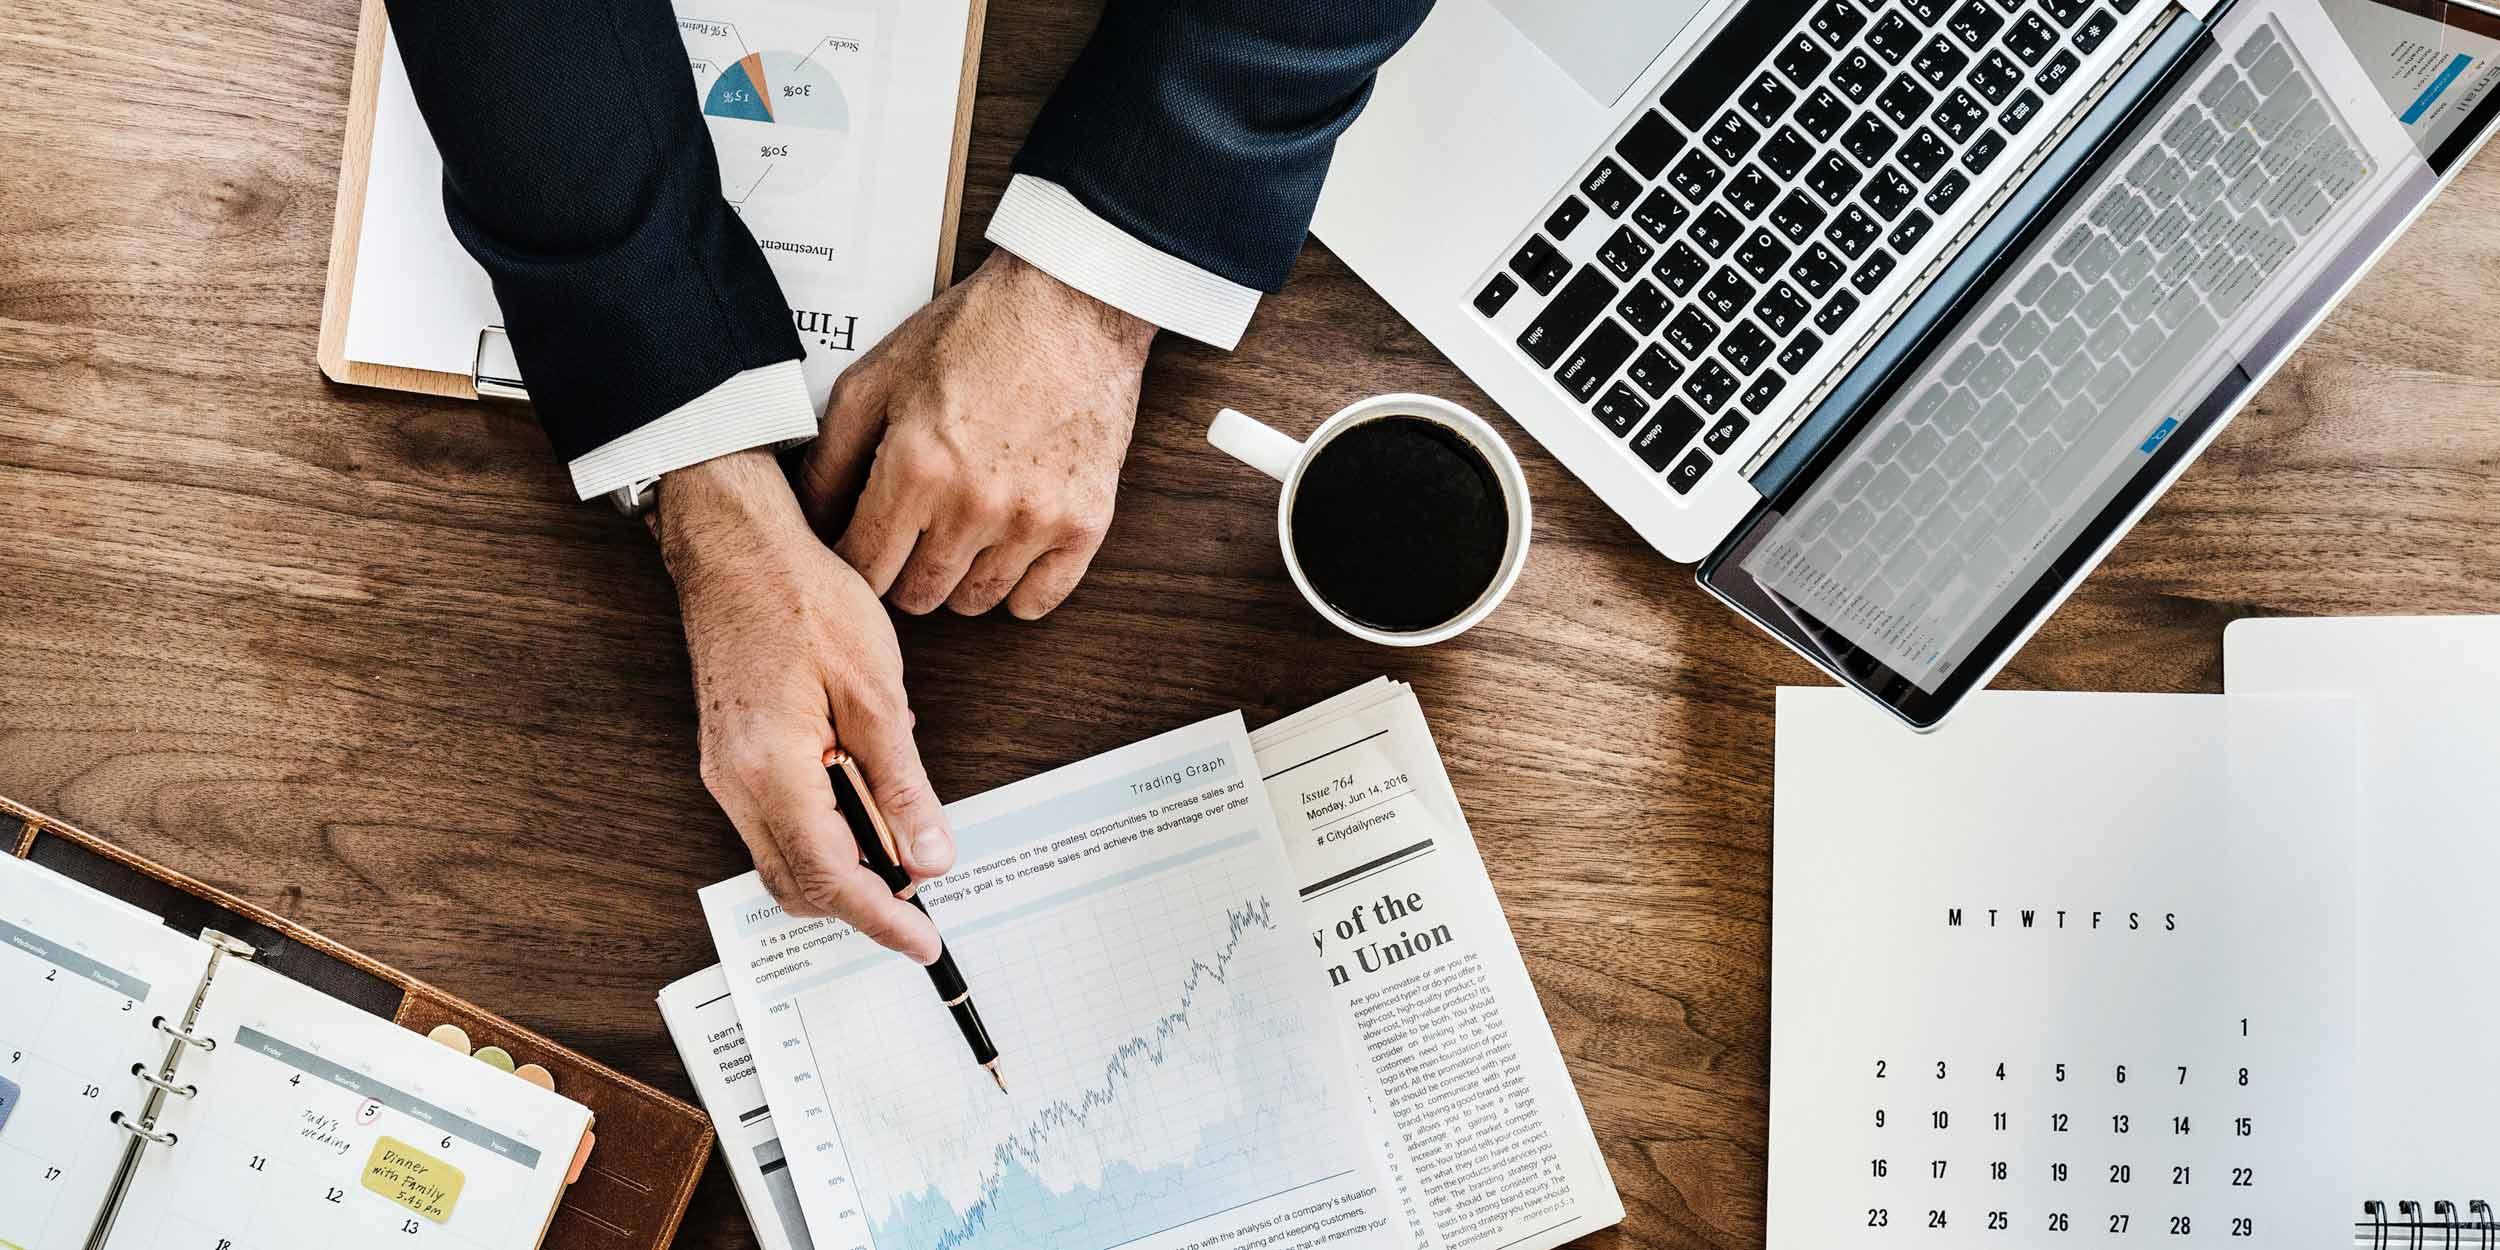

## Welcome to the Final Project!

This challenge requires you to __apply__ and __combine__ many concepts and methods that you have learned in this course.

This scenario could be a real-world case in the life of a Financial Analyst / Advisor. It requires a combination of <br>
- solid __coding skills__, <br><br>
- some __background knowledge in Finance/Investment__ (all you need to know is teached in the course)
and, even more important <br><br>
   
- the ability to __interpret__ and __understand__ the __underlying data and the client´s requests__ and the ability to __incorporate the Client´s inputs__ into your analysis <br> <br>
__Combining Expertise / hard Skills with case-specific Judgement__ -> requires some practise but also some talent.

### The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Marie recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br>
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---------------------------------------------------------------------

### Now it´s your Turn!

__Step 1: Identify the five stocks and get the respective Stock Tickers__! (use the __listings_clean.csv__ file)

----------------------------------

__Step 2: Create an appropriate Index from 1997 (hint: start with 1996-12-31) until the end of 2018 that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!__ Hint: Use Yahoo Finance!<br>
(At a first glance: Do you think her Portfolio performed well?)

----------------------------------

Mary did not closely monitor her Portfolio in the past. She is a very self-confident, if not overconfident person. Therefore, you suspect that she overestimates her portfolio´s past performance.

__Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!"__ Is she right?

----------------------------------

Once you have analyzed and educated Mary on the past Performance of her Portfolio, your task is to compare her Portfolio with similar designed Portfolios/Indexes of other Sectors (five largest companies). Your colleagues already prepared appropriate indexes for other sectors (sector_indexes.csv).

__Step 4: Analyze and compare the performance of Mary´s Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around__! <br>
Hint: Import and use the csv-file "__sector_indexes.csv__"

----------------------------

__Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare!__  Hint: Assume a risk-free Return of 1.3% p.a. <br>
(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

----------------------------------

The results of Step 5 support Mary´s belief that the Health Care Sector is the one and only Sector to be invested in: "Even if the Consumer Services- Sector showed a better Sharpe Ratio and a higher Return than Health Care, the Risk is simply too high!" And there is no benefit to add other Sectors with lower Sharpe Ratio than Health Care - this will not improve the Sharpe Ratio of my portfolio! Therefore, I will stick to my current Stock Portfolio!". Your argument __"Past Performance is no Guarantee / no Indicator of future Results"__ did not impress her much.

__Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!__

Hint: Simulate 50,000 random Portfolios (use np.random.seed(111)!) and show the best Portfolio as well as a visual summary of your analysis.

----------------------------------

Congrats! With your analysis, Mary agrees to diversify her Stock Portfolio by adding other Sectors! However, she still does not agree with "Past Performance is no Guarantee / no Indicator of future Results" and "The most valuable Stocks might also be the most overvalued Stocks". Given that Mary is not an easy person and given her considerable Wealth compared to her Lifestyle, you agree with your Boss that you (and Mary´s Portfolio) can live with the results of this first advisory round. Together with Mary, you make the following plan: __Adding those sectors__ to her Stock Portfolio that
- Showed a __positive Alpha__ over the most recent 4-Year Period
- Have a __Beta-Factor below 1__ (non-cyclical / defensive) as Mary expects/fears some Market Turmoil in the near Future.

__Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?__

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv).

# STOP HERE, IF YOU WANT TO DO THE CHALLENGE ON YOUR OWN!

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Some Guidance and Hints

### Step 1: Identify the five stocks and get the respective Stock Tickers!

Hint: Identify the __five largest stocks__ in the __Sector "Health Care"__ in terms of __Market Capitalization__! <br>
__Save__ the respective __Stock Tickers/Symbols__ in a list!

In [1]:
# run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
import datetime as dt
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.3f}'.format
%config InclineBackened.format_figure = 'svg'

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving listings_clean.csv to listings_clean.csv


In [3]:
# run the cell!
listings = pd.read_csv("listings_clean.csv", index_col= "Symbol")

In [4]:
# run the cell!
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services


In [5]:
# run the cell!
listings.tail()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
ZUMZ,NASDAQ,Zumiez Inc.,26.720,681919062.560,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.790,2147266454.000,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals
ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.850,165399468.600,2015,Health Care,Major Pharmaceuticals
ZYXI,NASDAQ,"Zynex, Inc.",5.020,161834880.480,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


### Now it´s your Turn!

In [ ]:
#Your Coding Cells
#Hint: Identify the five largest stocks in the Sector "Health Care" in terms of Market Capitalization!
#Save the respective Stock Tickers/Symbols in a list!

In [6]:
mask = listings.Sector == "Health Care"

In [7]:
health  = listings[mask].copy()
large_cap_health = health.nlargest(n = 5 , columns=["Market_Cap"])
#large_cap_health = listings[listings.Sector == "Health Care"].sort_values("Market_Cap", ascending=False).head(5)
large_cap_health

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


In [8]:
Tickers = large_cap_health.index.to_list()
Tickers

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

--------------------

In [ ]:
#the end of 2018

### Step 2: Create an appropriate Index from 1997 (start with 1996-12-31) until today that best reflects her strategy and create a normalized Price Chart (with Base Value 100 on 1996-12-31)!

In [9]:
start = "1997-01-01"
end = dt.date.today()
stocks = yf.download(tickers = Tickers ,
                     start = start ,
                     end = end,
                     auto_adjust = False)
stocks_csv = stocks[["Close", "Adj Close"]].copy().to_csv("stocks_new.csv",index=True)

[*********************100%***********************]  5 of 5 completed


In [10]:
stocks = pd.read_csv("stocks_new.csv",
                     header=[0,1],
                     index_col=[0],
                     parse_dates=[0]).swaplevel(1,axis =1)

In [11]:
stocks

Price        Close                               Adj Close                 \
Ticker         JNJ    MRK     NVS    PFE     UNH       JNJ    MRK     NVS   
Date                                                                        
1997-01-02  24.875 38.108  25.594 12.947   5.656    12.230 14.291  11.554   
1997-01-03  25.125 39.420  25.426 13.223   5.812    12.353 14.783  11.478   
1997-01-06  25.312 39.540  25.370 13.164   5.828    12.445 14.828  11.453   
1997-01-07  25.375 39.599  25.426 13.362   5.844    12.476 14.851  11.478   
1997-01-08  25.562 39.122  25.370 13.362   5.719    12.568 14.672  11.453   
...            ...    ...     ...    ...     ...       ...    ...     ...   
2025-09-24 176.690 79.670 123.000 24.090 351.810   176.690 79.670 123.000   
2025-09-25 177.730 77.600 122.230 23.600 345.560   177.730 77.600 122.230   
2025-09-26 179.710 78.560 123.650 23.760 344.080   179.710 78.560 123.650   
2025-09-29 181.620 78.580 124.100 23.850 345.180   181.620 78.580 124.100   
2025-09-30 185.420 83.930 128.240 25.480 345.300   185.420 83.930 128.240   

Price                      
Ticker        PFE     UNH  
Date                       
1997-01-02  4.934   4.410  
1997-01-03  5.039   4.532  
1997-01-06  5.017   4.544  
1997-01-07  5.092   4.556  
1997-01-08  5.092   4.459  
...           ...     ...  
2025-09-24 24.090 351.810  
2025-09-25 23.600 345.560  
2025-09-26 23.760 344.080  
2025-09-29 23.850 345.180  
2025-09-30 25.480 345.300  

[7232 rows x 10 columns]

In [12]:
portfolio_ret = stocks["Adj Close"].pct_change().dropna()
portfolio_ret

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.010,0.034,-0.007,0.021,0.028
1997-01-06,0.007,0.003,-0.002,-0.004,0.003
1997-01-07,0.002,0.002,0.002,0.015,0.003
1997-01-08,0.007,-0.012,-0.002,0.000,-0.021
1997-01-09,0.007,0.008,0.007,-0.009,-0.005
...,...,...,...,...,...
2025-09-24,0.001,-0.004,0.001,-0.002,0.012
2025-09-25,0.006,-0.026,-0.006,-0.020,-0.018
2025-09-26,0.011,0.012,0.012,0.007,-0.004


In [13]:
portfolio_weights = stocks["Close"].div(stocks["Close"].sum(axis = 'columns') , axis = 'index')
portfolio_weights

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-02,0.232,0.356,0.239,0.121,0.053
1997-01-03,0.230,0.362,0.233,0.121,0.053
1997-01-06,0.232,0.362,0.232,0.121,0.053
1997-01-07,0.232,0.361,0.232,0.122,0.053
1997-01-08,0.234,0.358,0.232,0.122,0.052
...,...,...,...,...,...
2025-09-24,0.234,0.105,0.163,0.032,0.466
2025-09-25,0.238,0.104,0.164,0.032,0.463
2025-09-26,0.240,0.105,0.165,0.032,0.459


In [14]:
portfolio_weights.sum(axis = 1)

,0
Date,
1997-01-02,1.000
1997-01-03,1.000
1997-01-06,1.000
1997-01-07,1.000
1997-01-08,1.000
...,...
2025-09-24,1.000
2025-09-25,1.000
2025-09-26,1.000


In [15]:
portfolio_ret.shape , portfolio_weights.shape

((7231, 5), (7232, 5))

In [16]:
portfolio_ret.mul(portfolio_weights.shift().dropna())

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.002,0.012,-0.002,0.003,0.001
1997-01-06,0.002,0.001,-0.001,-0.001,0.000
1997-01-07,0.001,0.001,0.001,0.002,0.000
1997-01-08,0.002,-0.004,-0.001,0.000,-0.001
1997-01-09,0.002,0.003,0.002,-0.001,-0.000
...,...,...,...,...,...
2025-09-24,0.000,-0.000,0.000,-0.000,0.005
2025-09-25,0.001,-0.003,-0.001,-0.001,-0.008
2025-09-26,0.003,0.001,0.002,0.000,-0.002


In [17]:
portfolio_weighted_return = portfolio_ret.mul(portfolio_weights.shift().dropna())
portfolio_weighted_return

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.002,0.012,-0.002,0.003,0.001
1997-01-06,0.002,0.001,-0.001,-0.001,0.000
1997-01-07,0.001,0.001,0.001,0.002,0.000
1997-01-08,0.002,-0.004,-0.001,0.000,-0.001
1997-01-09,0.002,0.003,0.002,-0.001,-0.000
...,...,...,...,...,...
2025-09-24,0.000,-0.000,0.000,-0.000,0.005
2025-09-25,0.001,-0.003,-0.001,-0.001,-0.008
2025-09-26,0.003,0.001,0.002,0.000,-0.002


In [18]:
# Geometric mean return for all the stocks or VMI
portfolio_index = portfolio_weighted_return.sum(axis=1).add(1).cumprod().mul(100).iloc[1:]
portfolio_index["1996-12-31"] = 100
portfolio_index.name = "Portfolio_Index"
portfolio_index.sort_index(ascending=True ,inplace=True)
portfolio_index

,Portfolio_Index
Date,
1996-12-31,100.000
1997-01-06,101.898
1997-01-07,102.263
1997-01-08,101.824
1997-01-09,102.294
...,...
2025-09-24,1382.921
2025-09-25,1367.284
2025-09-26,1372.850


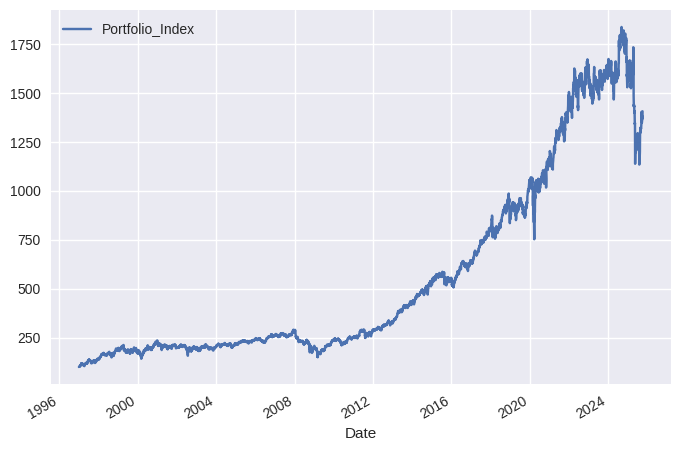

In [19]:
portfolio_index.plot()
plt.legend()
plt.show()

(At a first glance: Do you think Mary´s Portfolio performed well?)

Hint: Download and import historical prices from Yahoo Finance. Create a Price-weighted Total Return Index! (You need Close Prices and Adjusted Close Prices!)

### Step 3: Verify the following statement that she made during the first meeting with your boss: "For investments periods of 6 years or longer, I never lost money with my portfolio!" Is she right?

Hint: Create a Return Triangle with annual log Returns.

In [20]:
annual = portfolio_index.resample("YE").last().to_frame().to_period()

In [21]:
annual.head()

,Portfolio_Index
Date,
1996,100.000
1997,141.330
1998,191.626
1999,174.119
2000,235.431


In [22]:
annual.tail()

,Portfolio_Index
Date,
2021,1500.008
2022,1640.022
2023,1611.765
2024,1563.473
2025,1406.926


In [23]:
annual["Log_Return"] = np.log(annual.div(annual.shift()))
annual.dropna(inplace=True)

In [24]:
annual.head()

,Portfolio_Index,Log_Return
Date,,
1997,141.330,0.346
1998,191.626,0.304
1999,174.119,-0.096
2000,235.431,0.302
2001,201.511,-0.156


--------------------

In [25]:
years = annual.index.size
windows = [year for year in range(years,0,-1)]

In [26]:
for window in windows:
  annual[f"{window}Y"] = annual["Log_Return"].rolling(window).mean()

triangle_annual = annual.drop(columns =["Portfolio_Index","Log_Return"])
triangle_annual

,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,20Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325,0.304
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185,0.104,-0.096
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.214,0.170,0.103,0.302
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.140,0.089,0.017,0.073,-0.156
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.108,0.061,0.000,0.032,-0.103,-0.050
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.104,0.064,0.016,0.044,-0.042,0.015,0.080
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.099,0.064,0.024,0.048,-0.015,0.032,0.072,0.065
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.097,0.066,0.032,0.053,0.003,0.043,0.074,0.071,0.076


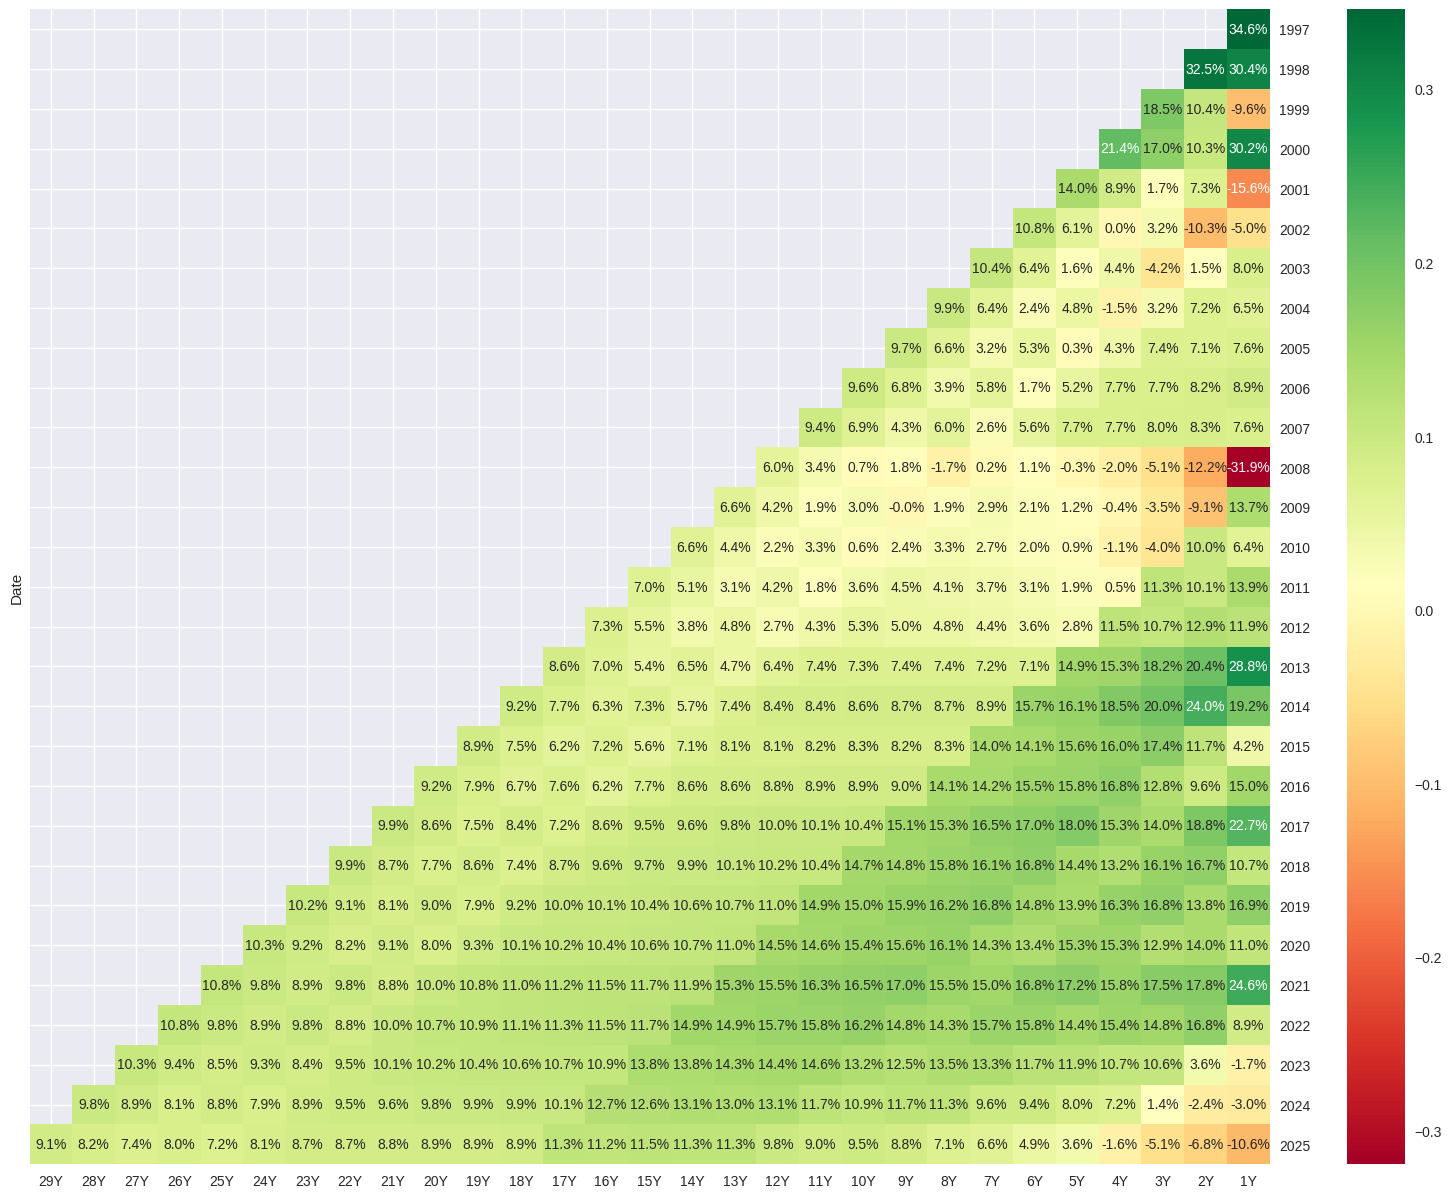

In [27]:
plt.figure(figsize = (20,15))
sns.heatmap(triangle_annual,
            vmin = triangle_annual.min().min(),
            vmax = triangle_annual.max().max(),
            cmap = "RdYlGn",
            annot = True,
            fmt = ".1%"
            )
plt.tick_params(axis = "y", labelright = True ,labelleft = False)
plt.yticks(rotation = 0)
sns.despine()

# **Mary is not right. Her portfolio even lost value in the nine-year Period 2001-2009 & 2023-2025**

### Step 4: Analyze and compare the performance of her Large-Cap Health Care Portfolio with other sectors for the most recent 4-years period from 2015 until 2018. Provide Mary with an interactive normalized Price Chart where she can play around!

Hint: Import and use the csv-file "sector_indexes.csv". Use an interactive Plotly Chart!

In [ ]:
# sector_etfs = {
#     "Basic Industries": "XLB",
#     "Capital Goods": "XLI",
#     "Consumer Durables": "XLY",
#     "Consumer Non-Durables": "XLP",
#     "Consumer Services": "XLY",  # or split differently
#     "Energy": "XLE",
#     "Finance": "XLF",
#     "Public Utilities": "XLU",
#     "Technology": "XLK",
#     "Transportation": "XTN"
# }
# sector_etfs.values()

In [ ]:
# sectors_tickers = list(sector_etfs.values())
# sectors = yf.download(tickers=sectors_tickers , start = start , end = end, auto_adjust=False)["Adj Close"].to_csv("Sectors.csv")

In [ ]:
#list(sector_etfs.keys())

In [28]:
upload_sectors = files.upload()

Saving sector_indexes.csv to sector_indexes.csv


In [29]:
df_sectors = pd.read_csv("sector_indexes.csv", index_col=["Date"], parse_dates=["Date"])
df_sectors

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236


In [30]:
df_sectors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2014-12-31 to 2018-12-28
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Basic Industries       1006 non-null   float64
 1   Capital Goods          1006 non-null   float64
 2   Consumer Durables      1006 non-null   float64
 3   Consumer Non-Durables  1006 non-null   float64
 4   Consumer Services      1006 non-null   float64
 5   Energy                 1006 non-null   float64
 6   Finance                1006 non-null   float64
 7   Public Utilities       1006 non-null   float64
 8   Technology             1006 non-null   float64
 9   Transportation         1006 non-null   float64
dtypes: float64(10)
memory usage: 86.5 KB


In [31]:
portfolio_index_2015_2019 = portfolio_index.loc["2014-12-31":"2018-12-28"]
normalized_portfolio_index_2015_2019 = portfolio_index_2015_2019.div(portfolio_index_2015_2019.iloc[0]).mul(100)
normalized_portfolio_index_2015_2019

,Portfolio_Index
Date,
2014-12-31,100.000
2015-01-02,99.953
2015-01-05,99.534
2015-01-06,99.806
2015-01-07,101.226
...,...
2018-12-21,163.591
2018-12-24,159.311
2018-12-26,165.433


In [ ]:
# sec_2015_2018 = df_sectors.loc["2014-12-31":dt.date.today()]
# sec_2015_2018.div(sec_2015_2018.iloc[0]).mul(100)

In [32]:
merged_indexes = pd.concat([df_sectors,normalized_portfolio_index_2015_2019 ], axis =1)
merged_indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Portfolio_Index
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313,163.591
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440,159.311
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236,165.433


In [33]:
fig1 = px.line(merged_indexes,
              x = merged_indexes.index,
              y = merged_indexes.columns,
              width = 900,
              height = 600,
              title = "portfolio_index_2015_2019 vs Other Indexes"
              )
#customize layout
fig1.update_layout(
    hovermode = 'x', #"x unified"
    xaxis_title = "Date",
    yaxis_title = "Index Value",
    legend_title = "Indexes"
)

fig1.show()
fig1.write_html("portfolio_index_2015_2019_vs_other_indexes.html")

--------------------

### Step 5: Compare annualized risk and return based on daily (simple) returns and create an appropriate plot! Calculate the Sharpe Ratio and compare!

(In terms of Sharpe Ratio, how did Mary´s Portfolio perform compared to the other Indexes?)

In [34]:
return_merged_indexes = merged_indexes.pct_change().dropna()
return_merged_indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Portfolio_Index
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038


In [35]:
#use the following user-defined function:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [36]:
sectors_index_summary = ann_risk_return(return_merged_indexes)
sectors_index_summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


Hint: Assume a risk-free Return of 1.3% p.a.

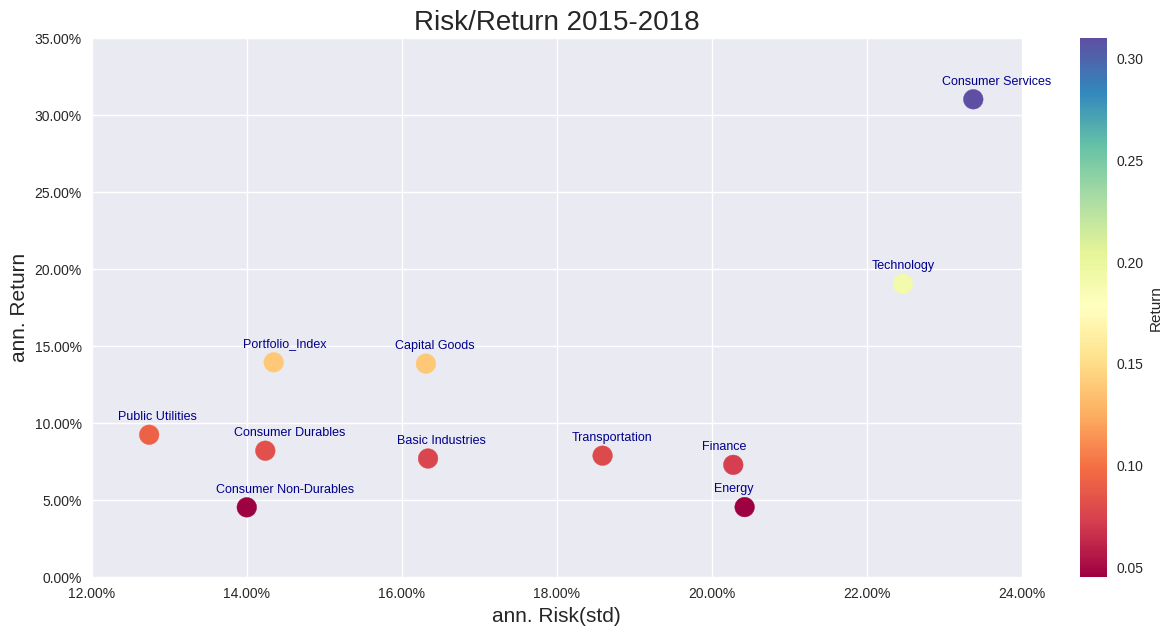

In [37]:
#use the following Code to create the plot (adjust the variable names if you used different ones!)

sectors_index_summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,7), s = 200, fontsize = 10,
             c = "Return", cmap = "Spectral")
for i in sectors_index_summary.index:
    plt.annotate(i,
                 xy=(sectors_index_summary.loc[i, "Risk"]-0.004, sectors_index_summary.loc[i, "Return"]+0.01), c = "darkblue",
                 size = 9)

plt.xlabel("ann. Risk(std)", fontsize = 15)
xticks1 = plt.xticks()[0]
xticks1_percentage = [f"{xtick*100:.2f}%" for xtick in xticks1]
plt.xticks(xticks1, xticks1_percentage)
plt.ylabel("ann. Return", fontsize = 15)

yticks1 = plt.yticks()[0]
yticks1_percentage = [f"{ytick*100:.2f}%" for ytick in yticks1]
plt.yticks(yticks1, yticks1_percentage)
plt.title("Risk/Return 2015-2018", fontsize = 20)

plt.show()

In [38]:
# Risk Free Assets with the annual return %1.3:
rf = [0.013 , 0]
rf

[0.013, 0]

--------------------

###  Step 6:  Show Mary that she could have improved the Sharpe Ratio of her Portfolio by adding other Sectors, without increasing the Total Risk of her Portfolio! Educate her on the Portfolio Diversification Effect!

Hint: Simulate 50,000 random Portfolios (use np.random.seed(111)!) and show the best Portfolio as well as a visual summary of your analysis.

In [39]:
noa = len(portfolio_ret.columns) #5: number of assets
nop = 50000 #number of portfolio

In [40]:
np.random.seed(111)
matrix = np.random.random(nop*noa).reshape(nop,noa)
matrix

array([[0.61217018, 0.16906975, 0.43605902, 0.76926247, 0.2953253 ],
       [0.14916296, 0.02247832, 0.42022449, 0.23868214, 0.33765619],
       [0.99071246, 0.23772645, 0.08119266, 0.66960024, 0.62124292],
       ...,
       [0.28613328, 0.68638287, 0.77019112, 0.72414199, 0.87131401],
       [0.55746114, 0.85604401, 0.1000753 , 0.52778243, 0.19719612],
       [0.89342113, 0.06567676, 0.84545797, 0.69272995, 0.49462468]])

In [41]:
matrix.sum(axis=1, keepdims=True)

array([[2.28188673],
       [1.16820411],
       [2.60047474],
       ...,
       [3.33816328],
       [2.238559  ],
       [2.9919105 ]])

In [42]:
simulated_weights = matrix / matrix.sum(axis = 1, keepdims=True)
#np.divide(simulated_return,simulated_return.sum(axis = 1 , keepdims=True))
simulated_weights

array([[0.26827369, 0.07409209, 0.19109582, 0.33711685, 0.12942154],
       [0.1276857 , 0.01924178, 0.35971838, 0.20431544, 0.2890387 ],
       [0.38097369, 0.09141656, 0.03122225, 0.25749154, 0.23889596],
       ...,
       [0.08571578, 0.20561693, 0.23072302, 0.21692827, 0.261016  ],
       [0.24902678, 0.38240851, 0.04470523, 0.23576883, 0.08809065],
       [0.29861225, 0.02195145, 0.28258131, 0.23153432, 0.16532068]])

In [43]:
portfolio_ret

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.010,0.034,-0.007,0.021,0.028
1997-01-06,0.007,0.003,-0.002,-0.004,0.003
1997-01-07,0.002,0.002,0.002,0.015,0.003
1997-01-08,0.007,-0.012,-0.002,0.000,-0.021
1997-01-09,0.007,0.008,0.007,-0.009,-0.005
...,...,...,...,...,...
2025-09-24,0.001,-0.004,0.001,-0.002,0.012
2025-09-25,0.006,-0.026,-0.006,-0.020,-0.018
2025-09-26,0.011,0.012,0.012,0.007,-0.004


In [44]:
simulated_weights.shape, matrix.shape,  portfolio_ret.shape

((50000, 5), (50000, 5), (7231, 5))

In [45]:
portfolio_return_with_simulated_weights = portfolio_ret.dot(simulated_weights.T)
# = simulated_weights @ simulated_return.T
# =np.matmul(simulated_weights,simulated_return.T)
portfolio_return_with_simulated_weights

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-03,0.015,0.012,0.019,0.024,0.017,0.019,0.018,0.020,0.021,0.013,...,0.011,0.029,0.016,0.018,0.013,0.029,0.017,0.018,0.023,0.011
1997-01-06,0.001,0.000,0.003,0.003,0.001,0.003,0.003,0.001,0.000,0.001,...,0.001,0.002,0.003,-0.001,0.001,0.002,0.001,0.000,0.002,0.001
1997-01-07,0.007,0.005,0.006,0.003,0.005,0.005,0.003,0.004,0.006,0.006,...,0.005,0.004,0.003,0.006,0.004,0.003,0.006,0.005,0.005,0.005
1997-01-08,-0.002,-0.006,-0.003,-0.013,-0.005,-0.001,-0.007,-0.010,-0.008,-0.004,...,-0.002,-0.011,-0.006,-0.005,-0.005,-0.015,-0.002,-0.008,-0.005,-0.002
1997-01-09,0.000,0.000,0.000,0.000,0.001,0.003,0.002,0.001,-0.002,-0.000,...,0.003,0.003,0.003,0.002,0.003,0.001,0.003,0.000,0.002,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,0.001,0.004,0.002,0.005,0.001,-0.000,0.003,0.003,0.003,0.003,...,0.001,0.000,0.003,-0.001,0.002,0.003,-0.001,0.002,-0.001,0.002
2025-09-25,-0.011,-0.011,-0.010,-0.016,-0.013,-0.010,-0.012,-0.017,-0.016,-0.010,...,-0.009,-0.021,-0.010,-0.017,-0.011,-0.021,-0.013,-0.015,-0.015,-0.008
2025-09-26,0.008,0.006,0.006,0.004,0.008,0.009,0.007,0.006,0.005,0.007,...,0.009,0.008,0.007,0.010,0.009,0.005,0.010,0.007,0.009,0.008


In [46]:
portfolio_return_with_simulated_weights_summary = ann_risk_return(portfolio_return_with_simulated_weights)
portfolio_return_with_simulated_weights_summary

,Return,Risk
0,0.117,0.184
1,0.135,0.189
2,0.130,0.193
3,0.156,0.225
4,0.118,0.184
...,...,...
49995,0.145,0.230
49996,0.103,0.188
49997,0.129,0.192
49998,0.111,0.198


In [47]:
for sector in sectors_index_summary.index:
  print(sector,":", type(sector))

Basic Industries : <class 'str'>
Capital Goods : <class 'str'>
Consumer Durables : <class 'str'>
Consumer Non-Durables : <class 'str'>
Consumer Services : <class 'str'>
Energy : <class 'str'>
Finance : <class 'str'>
Public Utilities : <class 'str'>
Technology : <class 'str'>
Transportation : <class 'str'>
Portfolio_Index : <class 'str'>


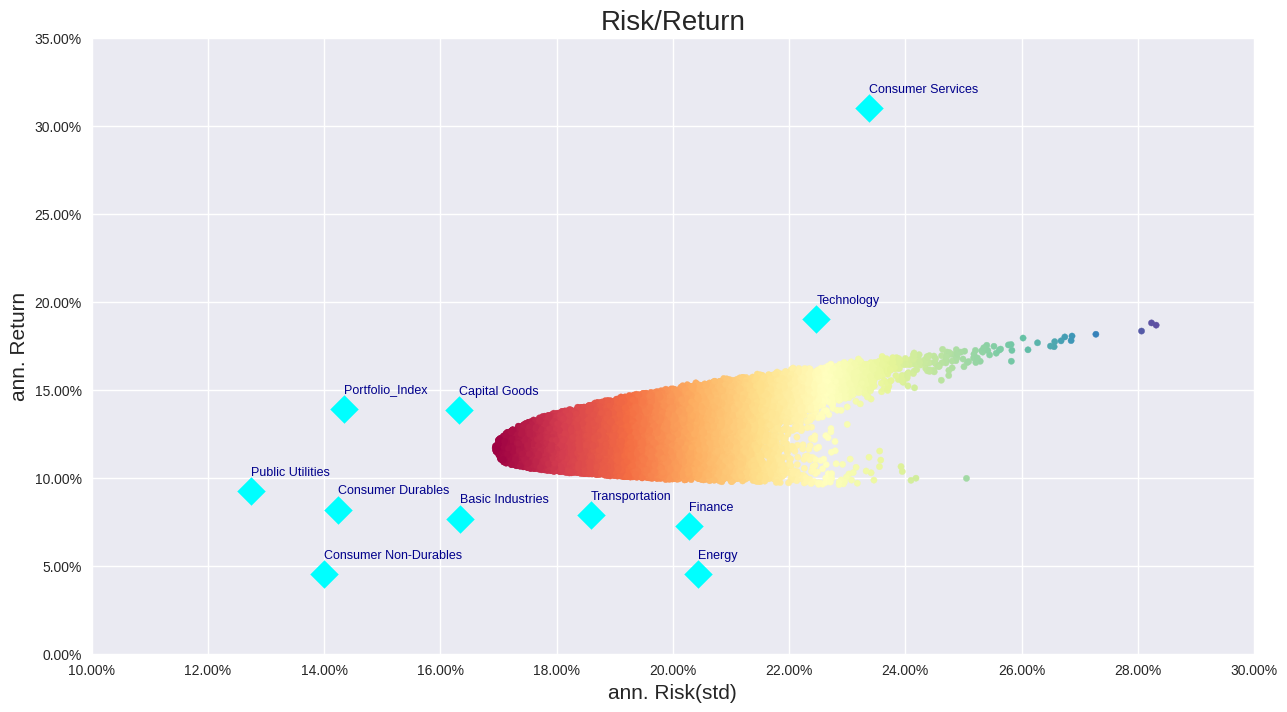

In [48]:
#use the following Code to create the plot (adjust the variable names if you used different ones!)

plt.figure(figsize = (15,8))
plt.scatter(portfolio_return_with_simulated_weights_summary.loc[:, "Risk"],
            portfolio_return_with_simulated_weights_summary.loc[:, "Return"],
            s= 20, c= portfolio_return_with_simulated_weights_summary["Risk"], cmap = "Spectral")

plt.scatter(sectors_index_summary.loc[:, "Risk"],
            sectors_index_summary.loc[:, "Return"],
            s= 200, color = "cyan", marker = "D")
for sector in sectors_index_summary.index:
  plt.annotate(sector,
               xy = (sectors_index_summary.loc[sector, "Risk"],
                     sectors_index_summary.loc[sector, "Return"]+0.009),
               fontsize = 9,
               color ="darkblue"
               )

plt.xlabel("ann. Risk(std)", fontsize = 15)
xticks1 = plt.xticks()[0]
xticks1_percentage = [f"{xtick*100:.2f}%" for xtick in xticks1]
plt.xticks(xticks1, xticks1_percentage)

plt.ylabel("ann. Return", fontsize = 15)
yticks1 = plt.yticks()[0]
yticks1_percentage = [f"{ytick*100:.2f}%" for ytick in yticks1]
plt.yticks(yticks1, yticks1_percentage)

plt.title("Risk/Return", fontsize = 20)
plt.show()

In [49]:
portfolio_return_with_simulated_weights_summary["Sharpe"] = (portfolio_return_with_simulated_weights_summary["Return"] - rf[0]) / portfolio_return_with_simulated_weights_summary["Risk"]
portfolio_return_with_simulated_weights_summary

,Return,Risk,Sharpe
0,0.117,0.184,0.564
1,0.135,0.189,0.644
2,0.130,0.193,0.608
3,0.156,0.225,0.635
4,0.118,0.184,0.569
...,...,...,...
49995,0.145,0.230,0.575
49996,0.103,0.188,0.477
49997,0.129,0.192,0.606
49998,0.111,0.198,0.495


In [50]:
msrp = portfolio_return_with_simulated_weights_summary["Sharpe"].idxmax()
msrp

np.int64(9424)

In [51]:
msrp_p = portfolio_return_with_simulated_weights_summary.iloc[msrp]
msrp_p

,9424
Return,0.146
Risk,0.191
Sharpe,0.695


In [52]:
msrp_w = simulated_weights[msrp]
msrp_w

array([0.33373621, 0.00384167, 0.3052611 , 0.00373819, 0.35342284])

In [53]:
msrp_w.shape

(5,)

In [54]:
port_optimal = portfolio_ret.mul(msrp_w)
port_optimal

Ticker,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.003,0.000,-0.002,0.000,0.010
1997-01-06,0.002,0.000,-0.001,-0.000,0.001
1997-01-07,0.001,0.000,0.001,0.000,0.001
1997-01-08,0.002,-0.000,-0.001,0.000,-0.008
1997-01-09,0.002,0.000,0.002,-0.000,-0.002
...,...,...,...,...,...
2025-09-24,0.000,-0.000,0.000,-0.000,0.004
2025-09-25,0.002,-0.000,-0.002,-0.000,-0.006
2025-09-26,0.004,0.000,0.004,0.000,-0.002


--------------------

### Step 7: Identify Sectors with positive Alpha and a Beta-Factor < 1. Which Sectors will be added to Mary´s Portfolio?

Hint: Use the S&P 500 Total Return Index as Market Portfolio (SP500_TR.csv). Calculate the following Metrics for the Sector Indexes and the Market Portfolio:
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha

In [55]:
merged_indexes

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Portfolio_Index
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,128.294,160.672,133.393,113.838,289.218,107.971,120.017,140.647,183.125,124.313,163.591
2018-12-24,124.953,155.393,126.147,111.800,282.379,104.768,117.474,135.757,181.658,120.440,159.311
2018-12-26,128.938,162.756,130.800,114.004,306.694,110.009,122.321,138.186,193.632,127.236,165.433


In [56]:
merged_indexes_ret = merged_indexes.pct_change().dropna()
merged_indexes_ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Portfolio_Index
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038


In [57]:
SP500_file = files.upload()

Saving SP500_TR.csv to SP500_TR.csv


In [58]:
SP500 = pd.read_csv("SP500_TR.csv", parse_dates=["Date"], index_col=["Date"]).Close.copy()
SP500

,Close
Date,
1988-12-30,288.120
1989-01-03,285.650
1989-01-04,289.990
1989-01-05,290.610
1989-01-06,291.290
...,...
2018-12-21,4802.510
2018-12-24,4672.660
2018-12-26,4904.490


In [59]:
df_sectors.shape , SP500.shape , portfolio_ret.shape
# we have to reindex them to have a whole dataframe with the same range of index.

((1006, 10), (7559,), (7231, 5))

In [60]:
SP500 = SP500.reindex(df_sectors.index)
SP500

,Close
Date,
2014-12-31,3769.440
2015-01-02,3768.680
2015-01-05,3700.030
2015-01-06,3667.140
2015-01-07,3710.940
...,...
2018-12-21,4802.510
2018-12-24,4672.660
2018-12-26,4904.490


In [61]:
ret_SP500 = SP500.pct_change().dropna()
ret_SP500

,Close
Date,
2015-01-02,-0.000
2015-01-05,-0.018
2015-01-06,-0.009
2015-01-07,0.012
2015-01-08,0.018
...,...
2018-12-21,-0.021
2018-12-24,-0.027
2018-12-26,0.050


In [62]:
merged_indexes_ret.shape,

((1005, 11),)

In [63]:
merged_indexes_ret["SP500"] = ret_SP500
merged_indexes_ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Portfolio_Index,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010,-0.021
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026,-0.027
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038,0.050


In [64]:
final_summary = ann_risk_return(merged_indexes_ret)

In [65]:
final_summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


In [66]:
final_summary["Sharp"] = (final_summary["Return"] - rf[0]) / final_summary["Risk"]
final_summary["TotalRisk_Var"] = np.power(final_summary["Risk"],2)

In [67]:
final_summary

,Return,Risk,Sharp,TotalRisk_Var
Basic Industries,0.077,0.163,0.390,0.027
Capital Goods,0.138,0.163,0.768,0.027
Consumer Durables,0.082,0.142,0.483,0.020
Consumer Non-Durables,0.045,0.140,0.229,0.020
Consumer Services,0.310,0.234,1.271,0.055
Energy,0.045,0.204,0.158,0.042
Finance,0.073,0.203,0.294,0.041
Public Utilities,0.092,0.127,0.621,0.016
Technology,0.190,0.225,0.789,0.050
Transportation,0.079,0.186,0.353,0.035


In [68]:
COV = merged_indexes_ret.cov()*252 # merged indexes annual covariance

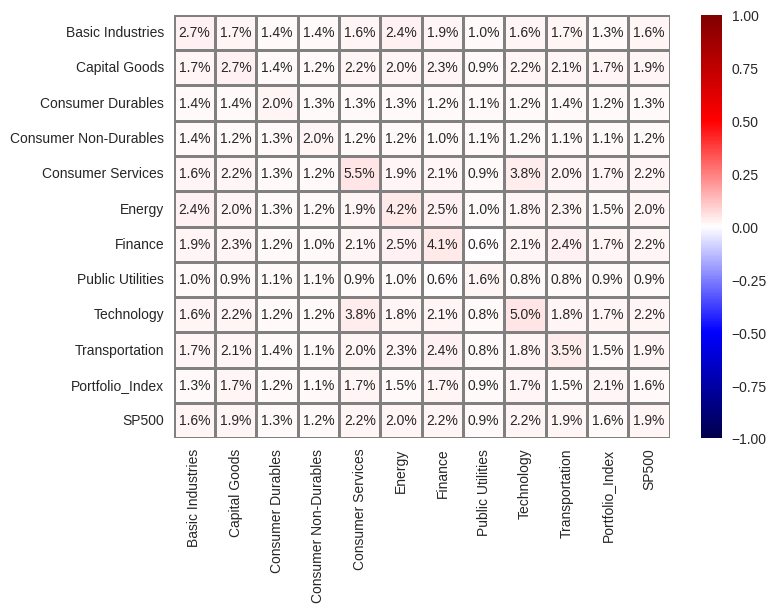

In [ ]:
sns.heatmap(COV ,
            annot = True,
            fmt ="0.1%",
            vmin = -1 ,
            vmax= +1 ,
            cmap = "seismic",
            linecolor='gray',
            linewidths=1)
sns.despine()

In [69]:
final_summary["SystRisk_Var"] = COV.iloc[:,-1] # COV["SP500"]
final_summary["UnsystRisk_Var"] = final_summary["TotalRisk_Var"] - final_summary["SystRisk_Var"]
final_summary["Beta"] = final_summary["SystRisk_Var"] / final_summary.loc["SP500","SystRisk_Var"]
final_summary["capm_ret"] = rf[0] + (final_summary.loc["SP500", "Return"] - rf[0]) * final_summary["Beta"]
final_summary["alpha"] = final_summary["Return"] - final_summary["capm_ret"]

In [70]:
final_summary

,Return,Risk,Sharp,TotalRisk_Var,SystRisk_Var,UnsystRisk_Var,Beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


In [71]:
final_summary.iloc[0].sum()

np.float64(1.6083827938886837)

In [72]:
for r in enumerate(final_summary.index):
  print(sum(final_summary.iloc[r[0]]))

1.6083827938886837
2.3034685849465695
1.5242073569200476
1.121579032514172
3.4385668796136577
1.5877328005929465
1.8880643053878854
1.4360108107576008
2.6722625380662417
1.785120277100999
2.177777554957953
1.7987124596357218


In [73]:
final_summary["sorting_metric"] = [sum(final_summary.iloc[r[0]]) for r in enumerate(final_summary.index)]

In [74]:
final_summary

,Return,Risk,Sharp,TotalRisk_Var,SystRisk_Var,UnsystRisk_Var,Beta,capm_ret,alpha,sorting_metric
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009,1.608
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058,2.303
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024,1.524
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008,1.122
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220,3.439
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035,1.588
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015,1.888
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049,1.436
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102,2.672
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000,1.785


In [75]:
final_summary_sorted = final_summary.sort_values("sorting_metric", ascending = False).drop(columns =["sorting_metric"])

In [78]:
fig_bar = px.bar(final_summary_sorted ,
              x = final_summary_sorted.index,
              y = final_summary_sorted.columns,
              title="Stacked Bar of Summary",
              width = 900,
              height =  700 ,
              barmode = 'stack')
fig_bar.show()
fig_bar.write_html("Stacked_Bar_of_Summary.html")
html_bar = fig_bar.to_html(full_html=False, include_plotlyjs='cdn')
with open("portfolio_analysis.html", "w") as f:
  f.write("<html><body>")
  f.write("<html><head><meta charset='utf-8'><title>Portfolio Analysis</title></head><body>")
  f.write("<h2>Portflio vs Other Sectors</h2>")
  f.write(html_bar)
  f.write("</body></html>")

In [80]:
import plotly.express as px

# Create chart
fig_bar = px.bar(
    final_summary_sorted,
    x=final_summary_sorted.index,
    y=final_summary_sorted.columns,
    title="Stacked Bar of Summary",
    width=900,
    height=700,
    barmode='stack'
)

# Save as full standalone HTML with title
fig_bar.write_html(
    "portfolio_analysis.html",
    full_html=True,
    include_plotlyjs='cdn'
)
fig_bar.show()

In [81]:
import plotly.express as px

# Create chart
fig_bar = px.bar(
    final_summary_sorted,
    x=final_summary_sorted.index,
    y=final_summary_sorted.columns,
    title="Stacked Bar of Summary",
    width=900,
    height=700,
    barmode='stack'
)

# Show in Colab
fig_bar.show()

# Export as fully standalone HTML (always works)
fig_bar.write_html(
    "portfolio_analysis.html",
    full_html=True,            # make it a complete webpage
    include_plotlyjs='cdn'     # load Plotly JS from CDN
)


In [77]:
alpha_mask = final_summary["alpha"] >0
beta_mask = final_summary["Beta"] <1
final_summary[alpha_mask & beta_mask]#.sort_values(["alpha", "Beta"], ascending = [False, False])

,Return,Risk,Sharp,TotalRisk_Var,SystRisk_Var,UnsystRisk_Var,Beta,capm_ret,alpha,sorting_metric
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009,1.608
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024,1.524
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049,1.436
Portfolio_Index,0.139,0.144,0.879,0.021,0.016,0.005,0.835,0.067,0.073,2.178


# Well Done!